#### Inciso p.  ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?


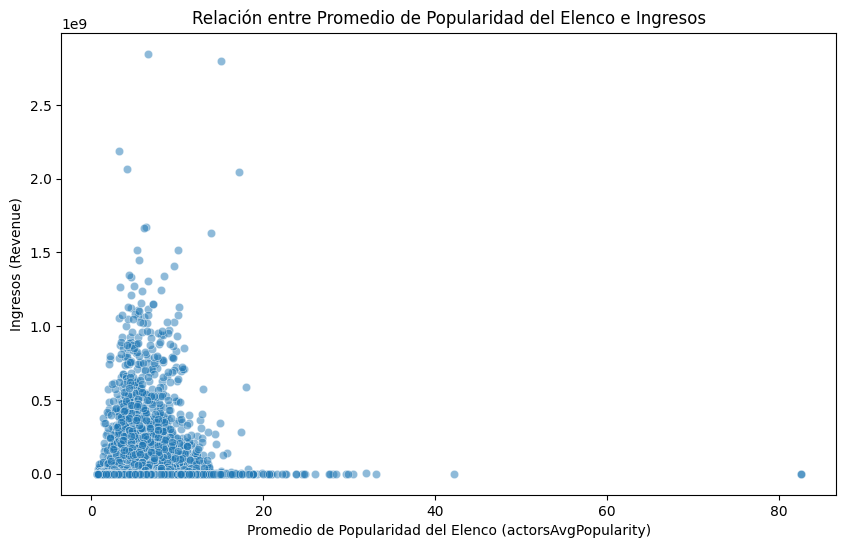

El coeficiente de correlacion entre la variable de presupueso y la de ingrersos es 0.0820834295538734


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('../movies.csv', encoding='latin1')

# Separar la columna "actorsPopularity" en una lista y calcular el promedio por película
df["actorsPopularity"] = df["actorsPopularity"].astype(str)
df["actorsAvgPopularity"] = (
    df["actorsPopularity"]
    .str.split("|")  # Dividir por '|'
    .apply(lambda x: pd.to_numeric(x, errors="coerce").mean() if isinstance(x, list) else None)
)

# Convertir ingresos (revenue) a numérico
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

# Filtrar datos válidos (eliminando valores nulos)
df_filtrada = df.dropna(subset=["actorsAvgPopularity", "revenue"])

# Crear un gráfico de dispersión: promedio de popularidad vs ingresos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtrada["actorsAvgPopularity"], y=df_filtrada["revenue"], alpha=0.5)

# Etiquetas y título
plt.xlabel("Promedio de Popularidad del Elenco (actorsAvgPopularity)")
plt.ylabel("Ingresos (Revenue)")
plt.title("Relación entre Promedio de Popularidad del Elenco e Ingresos")

# Mostrar gráfico
plt.show()

correlacion = df["actorsAvgPopularity"].corr(df["revenue"])
print("El coeficiente de correlacion entre la variable de presupueso y la de ingrersos es", correlacion)